In [ ]:
from google.colab import files
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
uploaded = files.upload() # Upload your CSV file
df = pd.read_csv("dataset1 (1).csv") # Replace with your file name
df.head()
print(df)

Saving dataset1.csv to dataset1 (2).csv
       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1461          20       RH         80.0    11622   Pave   NaN      Reg   
1    1462          20       RL         81.0    14267   Pave   NaN      IR1   
2    1463          60       RL         74.0    13830   Pave   NaN      IR1   
3    1464          60       RL         78.0     9978   Pave   NaN      IR1   
4    1465         120       RL         43.0     5005   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
194  1655         120       RL         24.0     2280   Pave   NaN      Reg   
195  1656         160       RL         24.0     2349   Pave   NaN      Reg   
196  1657         160       RL         24.0     2364   Pave   NaN      Reg   
197  1658         160       RL         24.0     2364   Pave   NaN      Reg   
198  1659         120       RL         24.0     2104   Pave   NaN      Reg   

    LandContour Utiliti

In [ ]:
# Summary of missing values
missing_summary = df.isnull().sum()
missing_percent = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_summary, 'Percentage (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
print(missing_df.head(10))

              Missing Values  Percentage (%)
PoolQC                   199      100.000000
MiscFeature              190       95.477387
Alley                    185       92.964824
Fence                    159       79.899497
MasVnrType               134       67.336683
FireplaceQu              101       50.753769
LotFrontage               28       14.070352
GarageType                12        6.030151
GarageFinish              12        6.030151
GarageQual                12        6.030151


In [ ]:

# Drop columns with more than 50% missing values
# Get a list of columns to drop that are actually in the DataFrame
drop_cols = [col for col in missing_df[missing_df['Percentage (%)'] > 50].index if col in df.columns]

# Now drop the columns that are actually in the dataframe
df = df.drop(columns=drop_cols)

print("Dropped columns (more than 50% missing values):")
print(drop_cols)

Dropped columns (more than 50% missing values):
[]


In [ ]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

print("Filled missing values in numerical columns using median:")
print(num_cols.tolist())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("\nFilled missing values in categorical columns using mode:")
print(cat_cols.tolist())

Filled missing values in numerical columns using median:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Filled missing values in categorical columns using mode:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 

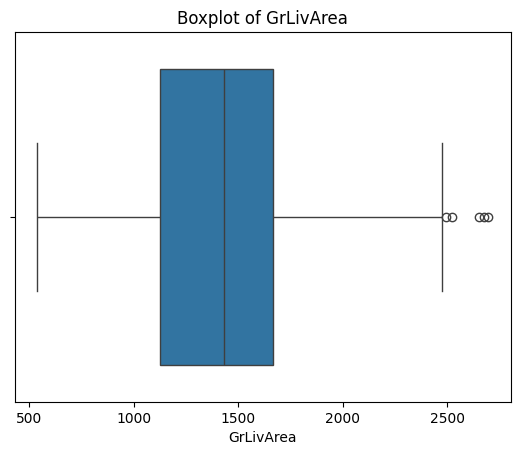

IQR: 544.5
Lower bound: 307.25
Upper bound: 2485.25
Rows before removing outliers: 199
Rows after removing outliers: 194
Total rows removed: 5


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in GrLivArea
sns.boxplot(x=df['GrLivArea'])
plt.title('Boxplot of GrLivArea')
plt.show()

# Remove extreme outliers using IQR method
q1 = df['GrLivArea'].quantile(0.25)
q3 = df['GrLivArea'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"IQR: {iqr}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Number of rows before and after removing outliers
before_rows = df.shape[0]
df = df[(df['GrLivArea'] >= lower_bound) & (df['GrLivArea'] <= upper_bound)]
after_rows = df.shape[0]

print(f"Rows before removing outliers: {before_rows}")
print(f"Rows after removing outliers: {after_rows}")
print(f"Total rows removed: {before_rows - after_rows}")

In [ ]:
# One-hot encoding for nominal variables
df = pd.get_dummies(df, drop_first=True)
print(f"Data shape after one-hot encoding: {df.shape}")
print(f"Total features after encoding: {df.shape[1]}")

Data shape after one-hot encoding: (194, 174)
Total features after encoding: 174


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))
df_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['int64', 'float64']).columns)

# Output statement
print(df_scaled.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.725786   -0.906996     0.739334  0.671590    -0.694092     0.436543   
1 -1.708308   -0.906996     0.788137  1.345186     0.079781     0.436543   
2 -1.690829   -0.054903     0.446519  1.233897    -0.694092    -0.436543   
3 -1.673351   -0.054903     0.641729  0.252917     0.079781     0.436543   
4 -1.655872    1.223237    -1.066362 -1.013546     1.627527    -0.436543   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0  -0.309787     -1.109034   -0.494615    0.088643  ...    1.483603   
1  -0.411707     -1.259071    0.184893    1.224767  ...   -0.738568   
2   0.913250      0.741418   -0.494615    0.895166  ...    0.165186   
3   0.947224      0.741418   -0.368780    0.423238  ...    0.101391   
4   0.743384      0.441345   -0.494615   -0.423238  ...    0.292775   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.386265    -0.674666      -0.37

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset1.csv' is the correct filename from the upload
# Using the 'dataset1.csv' key from the uploaded dictionary is more reliable
df = pd.read_csv('dataset1.csv')  # Update with the actual uploaded filename
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Basic info
print(df.shape)
df.info()

# Summary statistics
df.describe(include='all').T

(199, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             199 non-null    int64  
 1   MSSubClass     199 non-null    int64  
 2   MSZoning       199 non-null    object 
 3   LotFrontage    171 non-null    float64
 4   LotArea        199 non-null    int64  
 5   Street         199 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       199 non-null    object 
 8   LandContour    199 non-null    object 
 9   Utilities      199 non-null    object 
 10  LotConfig      199 non-null    object 
 11  LandSlope      199 non-null    object 
 12  Neighborhood   199 non-null    object 
 13  Condition1     199 non-null    object 
 14  Condition2     199 non-null    object 
 15  BldgType       199 non-null    object 
 16  HouseStyle     199 non-null    object 
 17  OverallQual    199 non-null    int64  
 18  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,199.0,NaN,NaN,NaN,1560.0,57.590508,1461.0,1510.5,1560.0,1609.5,1659.0
MSSubClass,199.0,NaN,NaN,NaN,62.763819,46.784478,20.0,20.0,50.0,80.0,190.0
MSZoning,199,5,RL,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,171.0,NaN,NaN,NaN,64.619883,22.356772,21.0,51.5,67.0,80.0,124.0
LotArea,199.0,NaN,NaN,NaN,9020.306533,3918.449337,1476.0,6926.5,9215.0,11119.5,20062.0
...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,199.0,NaN,NaN,NaN,85.025126,894.597632,0.0,0.0,0.0,0.0,12500.0
MoSold,199.0,NaN,NaN,NaN,4.703518,2.059111,1.0,3.0,5.0,6.0,11.0
YrSold,199.0,NaN,NaN,NaN,2009.824121,0.381678,2009.0,2010.0,2010.0,2010.0,2010.0
SaleType,199,7,WD,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Total missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

# Combine into one table
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    '% of Total Values': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,% of Total Values
PoolQC,199,100.000000
MiscFeature,190,95.477387
Alley,185,92.964824
Fence,159,79.899497
MasVnrType,134,67.336683
FireplaceQu,101,50.753769
LotFrontage,28,14.070352
GarageType,12,6.030151
GarageQual,12,6.030151
GarageFinish,12,6.030151


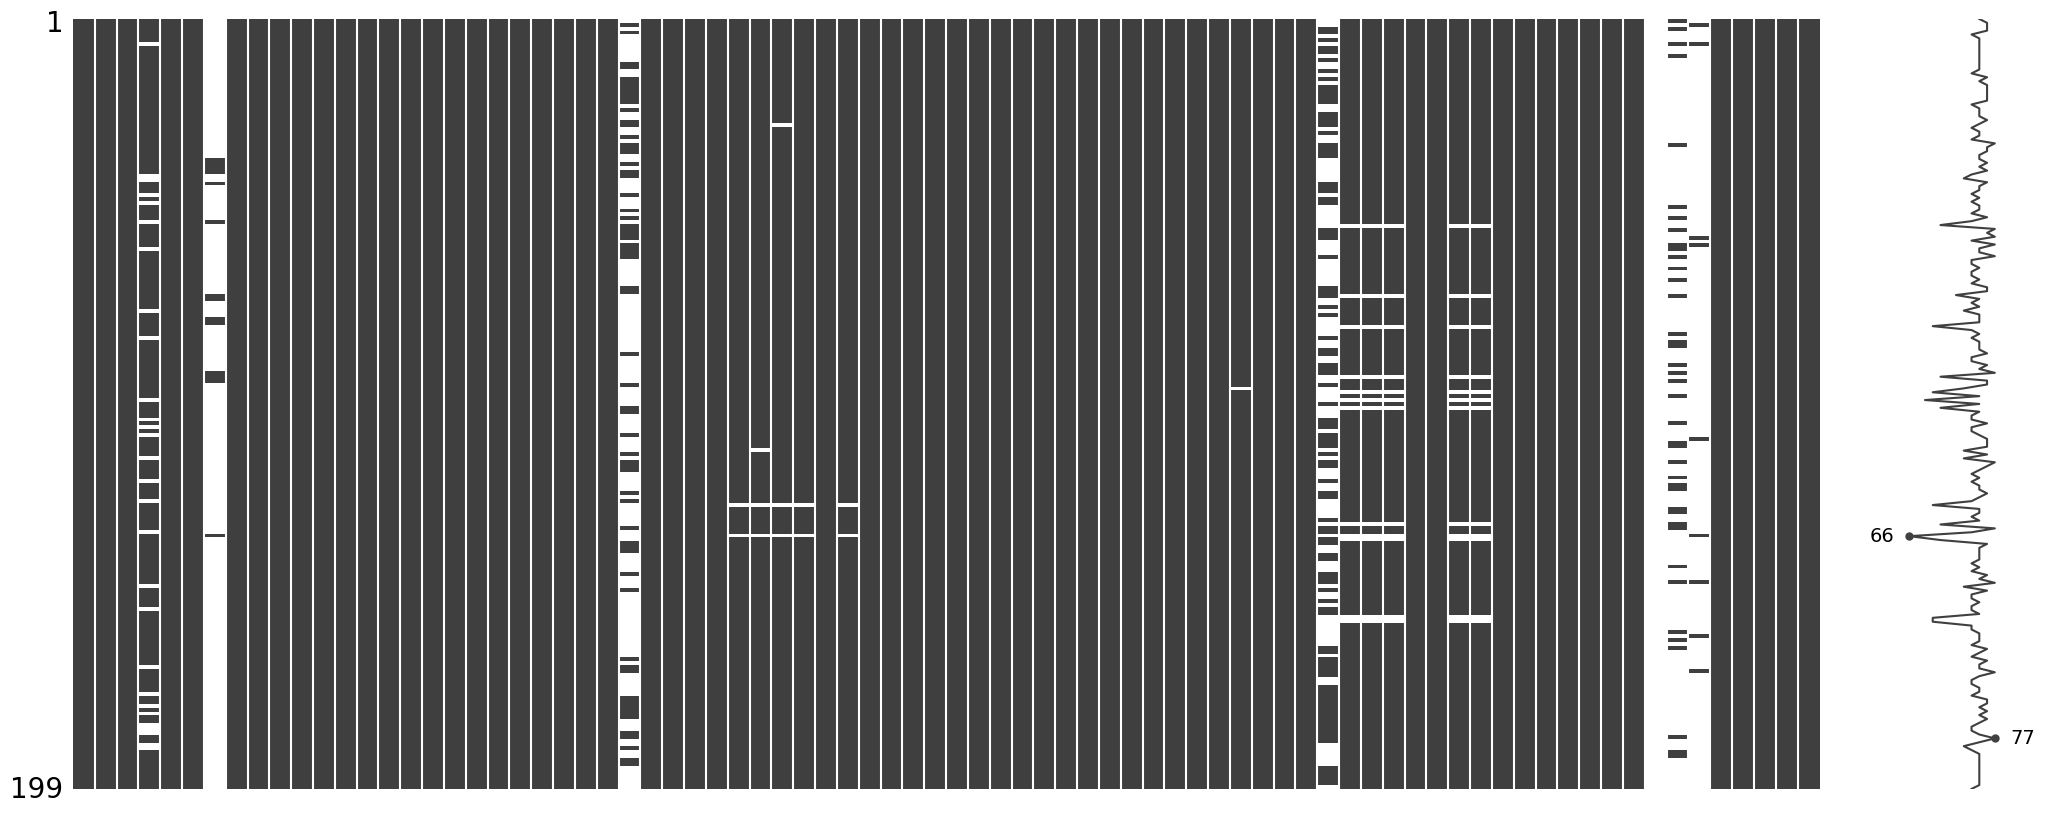

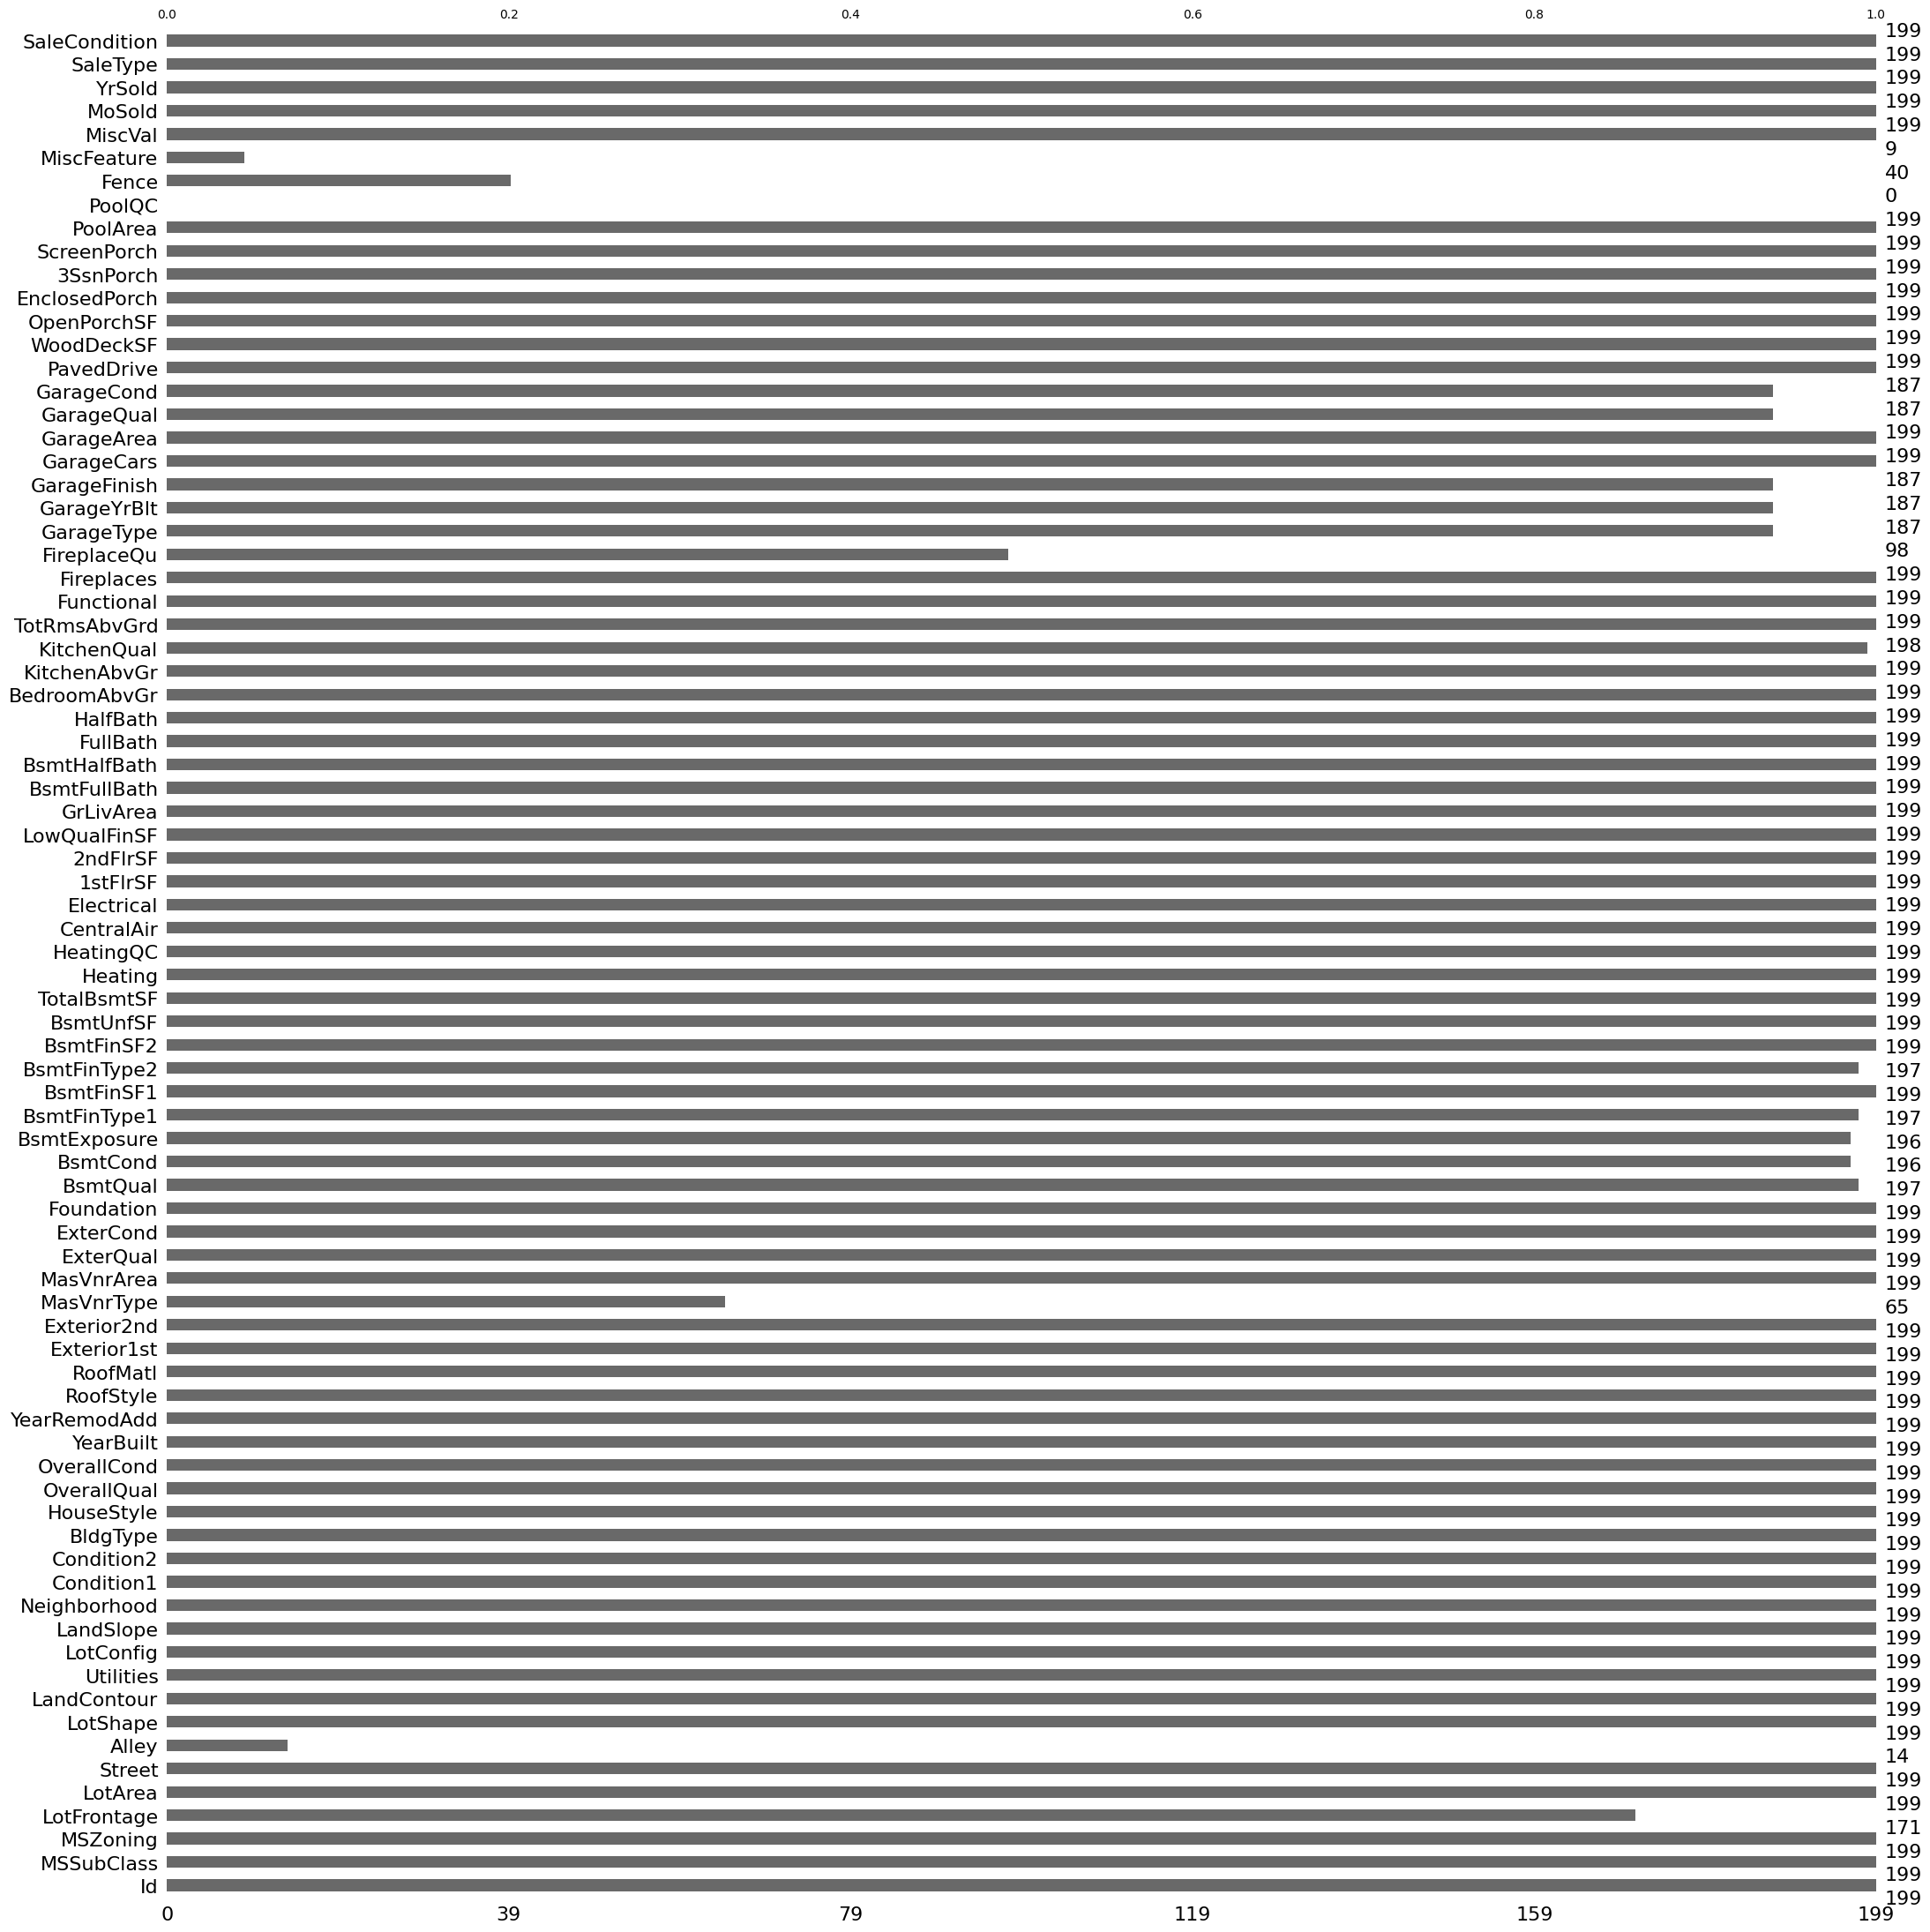

In [ ]:
import missingno as msno

# Heatmap of missing data
msno.matrix(df)
plt.show()

# Bar chart of missing values
msno.bar(df)
plt.show()

Saving dataset1.csv to dataset1 (3).csv
First 5 rows of the dataset:
   ï»¿Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         N

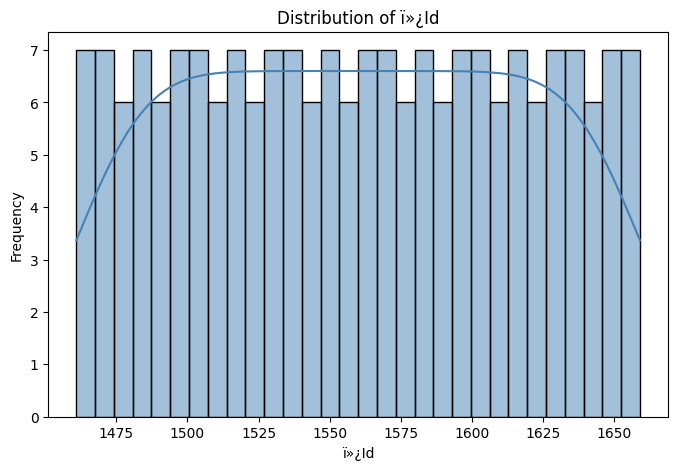

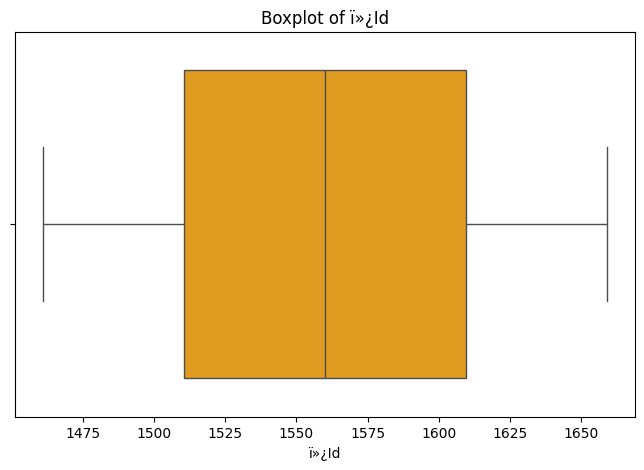

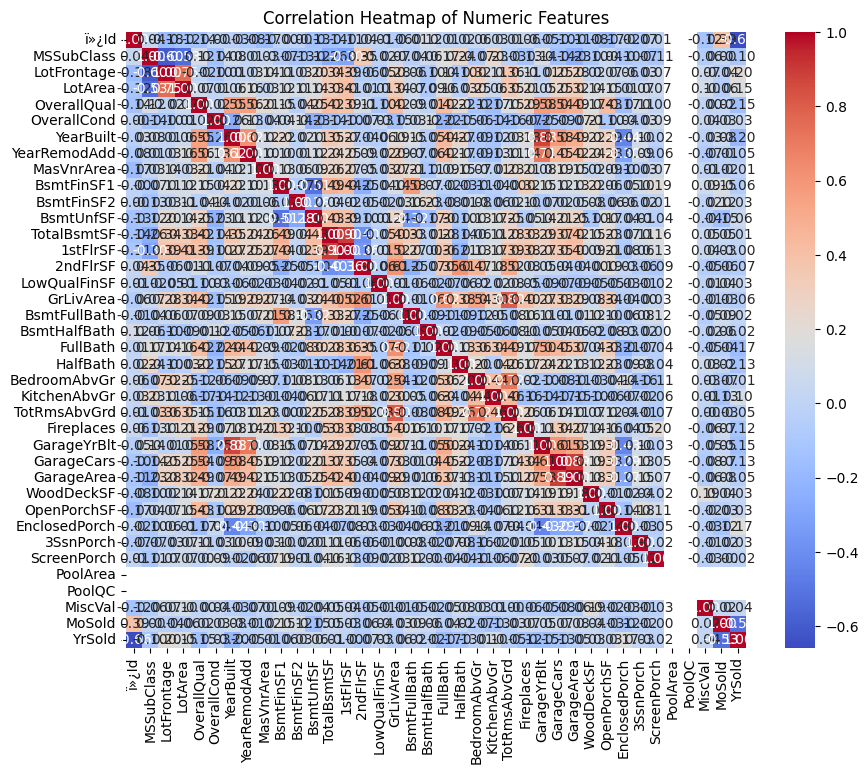

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For file upload in Colab
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Automatically detect filename
filename = list(uploaded.keys())[0]

# Read the dataset
df = pd.read_csv(filename, encoding='ISO-8859-1')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# List all column names
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric columns:")
print(numeric_cols)

# If no numeric column found
if not numeric_cols:
    print("No numeric columns available for EDA.")
else:
    # Histogram of first numeric column
    target_col = numeric_cols[0]
    plt.figure(figsize=(8, 5))
    sns.histplot(df[target_col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[target_col], color='orange')
    plt.title(f'Boxplot of {target_col}')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

In [52]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Simulate a target column for demonstration (replace this with actual target if available)
df['Target'] = np.random.randint(100000, 500000, size=len(df))  # Simulated house prices

# Step 2: Separate features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Step 3: One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Clean data
X = X.dropna(axis=1, how='all')        # Drop columns with all NaNs
X = X.loc[:, X.nunique() > 1]          # Drop constant/zero-variance columns
X = X.fillna(0)                        # Fill remaining missing values with 0

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Step 9 completed successfully: Cleaned, encoded, split, and scaled feature data.")

Step 9 completed successfully: Cleaned, encoded, split, and scaled feature data.


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

# Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.4f}\n")

# Evaluate all models
print("Step 10 completed: Model training and predictions done.\n")
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

Step 10 completed: Model training and predictions done.

Linear Regression:
  RMSE: 715747.76
  R² Score: -37.0757

Random Forest:
  RMSE: 124776.99
  R² Score: -0.1572

XGBoost:
  RMSE: 135281.66
  R² Score: -0.3602



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-54-b498be3e48d2>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=eval_df, palette='Blues_d')


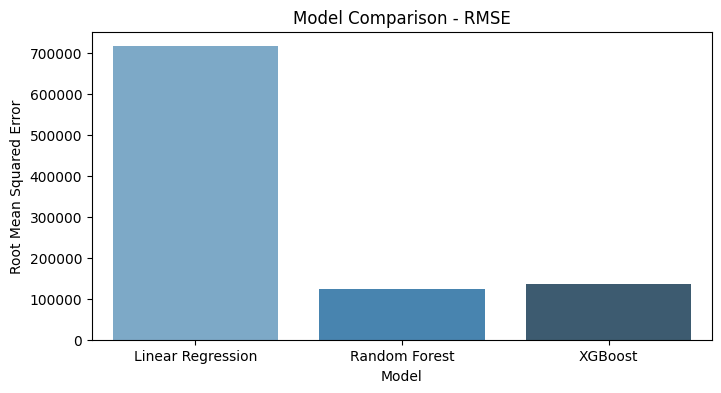

<ipython-input-54-b498be3e48d2>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=eval_df, palette='Greens_d')


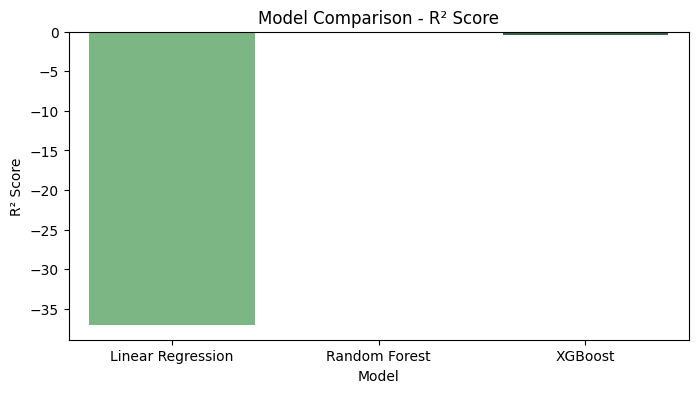

Step 11 completed: Models saved, downloadable, and visual performance plotted.


In [54]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Save trained models and scaler
joblib.dump(lr_model, "linear_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Download files (for Google Colab)
from google.colab import files
files.download("linear_model.pkl")
files.download("random_forest_model.pkl")
files.download("xgboost_model.pkl")
files.download("scaler.pkl")

# Evaluate models for visualization
models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmses = [
    np.sqrt(mean_squared_error(y_test, lr_preds)),
    np.sqrt(mean_squared_error(y_test, rf_preds)),
    np.sqrt(mean_squared_error(y_test, xgb_preds))
]
r2s = [
    r2_score(y_test, lr_preds),
    r2_score(y_test, rf_preds),
    r2_score(y_test, xgb_preds)
]

# Create DataFrame for plotting
eval_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmses,
    'R2 Score': r2s
})

# Plot RMSE
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='RMSE', data=eval_df, palette='Blues_d')
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error')
plt.show()

# Plot R² Score
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='R2 Score', data=eval_df, palette='Greens_d')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.show()

print("Step 11 completed: Models saved, downloadable, and visual performance plotted.")